## CMPE 343 
## Mini-Mini Project

In this notebook, we present an example project on how to use pandas, numpy and matplotlib to work with tabular data and infer statistical results. 

In [151]:
import numpy as np # for mathematical operations
import pandas as pd # to manipulate dataset
import matplotlib.pyplot as plt # to plot out data

## Data Preparation

In [152]:
# To read csv file as a pandas datasheet
data = pd.read_csv("data.csv")
data
# Data are in meters, kilograms, and centimeters.

,person,height,weight,foot size
0,male,1.82,81.64,30.48
1,male,1.80,86.18,27.94
2,male,1.70,77.11,30.48
3,male,1.80,74.84,25.40
4,female,1.52,45.35,15.24
5,female,1.67,68.03,20.32
6,female,1.65,58.96,17.78
7,female,1.75,68.03,22.86
8,female,1.63,69.78,20.24
9,male,1.88,85.81,30.81


In [153]:
# We can split the data in two categories
data_male = data[data["person"] == "male"].drop("person", axis=1)
data_female = data[data["person"] == "female"].drop("person", axis=1)
data_female

,height,weight,foot size
4,1.52,45.35,15.24
5,1.67,68.03,20.32
6,1.65,58.96,17.78
7,1.75,68.03,22.86
8,1.63,69.78,20.24
11,1.50,50.20,13.85
12,1.69,59.26,16.48
13,1.50,49.42,14.75
14,1.66,59.86,18.69
16,1.81,61.87,27.38


In [154]:
# calculate mean and variance for each feature and category
all_means = dict()
all_vars = dict()
for feature in data.columns[1:]: # we exclude the "person" column
    all_means[feature] =  data[feature].mean()
    all_vars[feature] = data[feature].var()

male_means = dict()
male_vars = dict()
for feature in data_male.columns:
    male_means[feature] =  data_male[feature].mean()
    male_vars[feature] = data_female[feature].var()

female_means = dict()
female_vars = dict()
for feature in data_female.columns:
    female_means[feature] =  data_female[feature].mean()
    female_vars[feature] = data_female[feature].var()

In [155]:
male_means["height"]

np.float64(1.775666666666667)

### The Gaussian Distribution
$$p(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{(x-\mu)^{2}}{2\sigma^2}}$$

In [156]:
def gaussian(x,mean, var):
    return (np.pow(np.e, -np.pow(x-mean,2)/(2*var)))/np.sqrt(2*np.pi*var)

In [157]:
# Probability density function for height 
def height_density(height):
    return gaussian(height, all_means["height"], all_vars["height"])

/var/folders/7q/bhs_xpzs77l2grcmv7mpx75r0000gn/T/ipykernel_55207/435208179.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


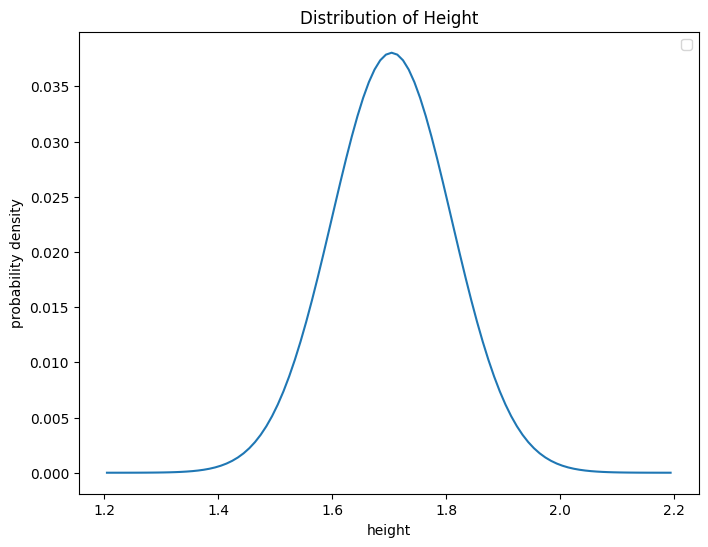

In [158]:
step_size = 0.01
width = 0.5
mean = all_means["height"]
x_values = np.arange(mean-width, mean+width, step_size)
y_values = height_density(x_values)*step_size
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values)
plt.title("Distribution of Height")
plt.xlabel("height")
plt.ylabel("probability density")
plt.legend()
plt.show()

In [159]:
# It's hard to take integrals on a computer. 
# Instead we can estimate the area under the curve with rectangles

area = 0
for x in x_values:
    area+=height_density(x)*step_size
print(area) 
# We see that area is really close to 1, which shows that our PDF implementation is correct.

0.9999981055598661


## A Dating Problem

### Part 1 
Let's say Alice is looking for a man in finance, 6'5", with blue eyes. She decided to try a dating app and was matched with someone. From his bio, she knoww that he works in finance and has blue eyes, but there is no information about his height.

Disregarding the information from his bio and using only the dataset above, she wants to calculate the probability that she is matched with someone taller than 6'5" (approximately 1.95 m). What does she find?
$$P(1.95<\text{height}|\text{male})$$

In [174]:
step_size = 0.01 # should be small for accuracy
area = 0
for x in np.arange(1.95, 2.5, step_size):
    area+= gaussian(x, male_means["height"], male_vars["height"])*step_size
print("P(1.95<x|male) = ", area)

P(1.95<x|male) =  0.030856858152236415


Alice finds that she is matched with a 6'5'' man with only 0.03 probability. Not so promising. Still she tries her chance.

### Part 2
She finally started talking with her potential partner and learned that he is indeed 6'5". Hooray! Alice is this close to finding her soulmate.

To meet in person, she arranged a date at a nice café. While waiting, she sees him walking down the street with someone, and they hug before saying goodbye. She could only make out a slight silhouette and suspect that this person might be another woman, which makes her jealous. However, she decides not to jump to conclusions and instead use the data at her hand.

She observed that this person appeared to be 20–25 centimeters shorter than her potential partner and guessed their weight to be around 60–65 kilograms. Based on these observations and the dataset provided above, can you determine the gender of this mysterious individual?

If $$P(\text{female}| h, w) > P(\text{male}| h, w)$$ where $h = 1.70 < \text{height}< 1.75$ and $w = 60 < \text{weight}< 65$, we will conclude that this person is a female. 

Notice that we can write these conditional probabilities as
$$P(\text{gender}| h,w) = \frac{P(\text{gender},h,w)}{P(h,w)}$$
And extend the numerator using the Bayes rule,
$$P(\text{gender}| h,w) = \frac{
    P(h|w,\text{gender})P(w|\text{gender})P(\text{gender})
}{P(h,w)}$$
Here we will make a couple of obversations,
- When comparing $P(\text{female}| h, w) > P(\text{male}| h, w)$, the denominator is same for both sides and equal to $P(h,w)$. Therefore we can disregard it.
- A priori, we know that $P(female)=P(male)=0.5$. We can again disregard this term since it's same for both side.

To simplify things a bit further, we assume that height and weight are conditionally independent given gender. In other words,
$$P(H|W,\text{gender}) = P(H|\text{gender})$$
$$P(W|H,\text{gender}) = P(W|\text{gender})$$
Of course this assumption is not realistic, since height and weight are correlated in real life. However, let's move on with this.

Then, 
$$ P(\text{female}| h, w) > P(\text{male}| h, w) \iff P(h|\text{female})P(w|\text{female}) > P(h|\text{male})P(w|\text{male})$$

In [161]:
# Let's calculate these probabilities
step_size = 0.01 # should be small for accuracy
H = np.arange(1.70, 1.75, step_size)
W = np.arange(60, 65, step_size)

h_female = 0
h_male = 0
for x in H:
    h_female+= gaussian(x, female_means["height"], female_vars["height"])*step_size
    h_male+= gaussian(x, male_means["height"], male_vars["height"])*step_size

w_female = 0
w_male = 0
for x in W:
    w_female+= gaussian(x, female_means["weight"], female_vars["weight"])*step_size
    w_male+= gaussian(x, male_means["weight"], male_vars["weight"])*step_size

In [162]:
print("P(h|female)P(w|female):",h_female*w_female)
print("P(h|male)P(w|male):    ",h_male*w_male)

P(h|female)P(w|female): 0.024684338161801763
P(h|male)P(w|male):     0.009648049347138777


Which means in fact $P(\text{female}| h, w) > P(\text{male}| h, w) $. Sorry Alice.